# Milestone 2: Data Exploration & Initial Preprocessing

## Github
https://github.com/PranavKambhampati/CSE151GroupProject


# Data Exploration

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Download latest version
pathNvidia = kagglehub.dataset_download("programmerrdai/nvidia-stock-historical-data")

csv_file_path = f"{pathNvidia}/NVDA (1).csv"

# Load the data into a pandas DataFrame
df = pd.read_csv(csv_file_path)

#print data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.04,0.05,0.04,0.04,0.04,2714688000
1,1999-01-25,0.04,0.05,0.04,0.05,0.04,510480000
2,1999-01-26,0.05,0.05,0.04,0.04,0.04,343200000
3,1999-01-27,0.04,0.04,0.04,0.04,0.04,244368000
4,1999-01-28,0.04,0.04,0.04,0.04,0.04,227520000
...,...,...,...,...,...,...,...
6388,2024-06-12,123.06,126.88,122.57,125.20,125.20,299595000
6389,2024-06-13,129.39,129.80,127.16,129.61,129.61,260704500
6390,2024-06-14,129.96,132.84,128.32,131.88,131.88,309320400
6391,2024-06-17,132.99,133.73,129.58,130.98,130.98,288504400


In [2]:
# First few rows
print(df.head(), "\n")

# Information on columns, data types, and non-null counts
print(df.info(), "\n")

# Display summary statistics
print(df.describe())

         Date  Open  High  Low  Close  Adj Close      Volume
0  1999-01-22  0.04  0.05 0.04   0.04       0.04  2714688000
1  1999-01-25  0.04  0.05 0.04   0.05       0.04   510480000
2  1999-01-26  0.05  0.05 0.04   0.04       0.04   343200000
3  1999-01-27  0.04  0.04 0.04   0.04       0.04   244368000
4  1999-01-28  0.04  0.04 0.04   0.04       0.04   227520000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6393 non-null   object 
 1   Open       6393 non-null   float64
 2   High       6393 non-null   float64
 3   Low        6393 non-null   float64
 4   Close      6393 non-null   float64
 5   Adj Close  6393 non-null   float64
 6   Volume     6393 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 349.7+ KB
None 

         Open    High     Low   Close  Adj Close        Volume
count 6393.00 6393.00 6393.00 63

### Data Preprocessing Steps:



In [3]:
# Check for any missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

na_values = df.isna().sum()
print("\nNA values in each column:\n", na_values)

Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

NA values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
df['Volume'].describe()

,Volume
count,6393.00
mean,607335174.96
std,432810340.78
min,19680000.00
25%,347701000.00
50%,509304000.00
75%,737192000.00
max,9230856000.00


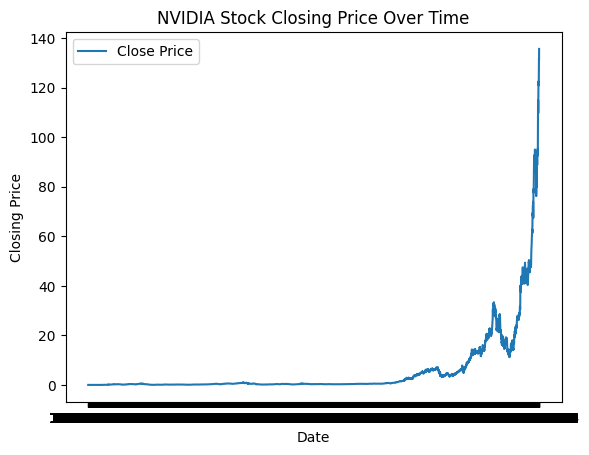

In [5]:
# plt.scatter(df['Date'], df['Close'])

plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('NVIDIA Stock Closing Price Over Time')
plt.legend()
plt.show()

In [6]:
df_r = df[df['Date'] > '2022-01-01']
df_r

,Date,Open,High,Low,Close,Adj Close,Volume
5775,2022-01-03,29.82,30.71,29.79,30.12,30.08,391547000
5776,2022-01-04,30.28,30.47,28.35,29.29,29.25,527154000
5777,2022-01-05,28.95,29.42,27.53,27.60,27.56,498064000
5778,2022-01-06,27.64,28.44,27.07,28.18,28.14,454186000
5779,2022-01-07,28.14,28.42,27.06,27.25,27.21,409939000
...,...,...,...,...,...,...,...
6388,2024-06-12,123.06,126.88,122.57,125.20,125.20,299595000
6389,2024-06-13,129.39,129.80,127.16,129.61,129.61,260704500
6390,2024-06-14,129.96,132.84,128.32,131.88,131.88,309320400
6391,2024-06-17,132.99,133.73,129.58,130.98,130.98,288504400


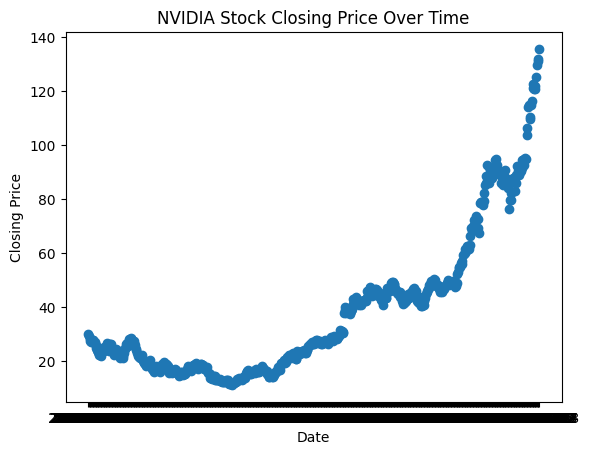

In [7]:
plt.scatter(df_r['Date'], df_r['Close'], label = 'Close Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('NVIDIA Stock Closing Price Over Time')
plt.show()

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

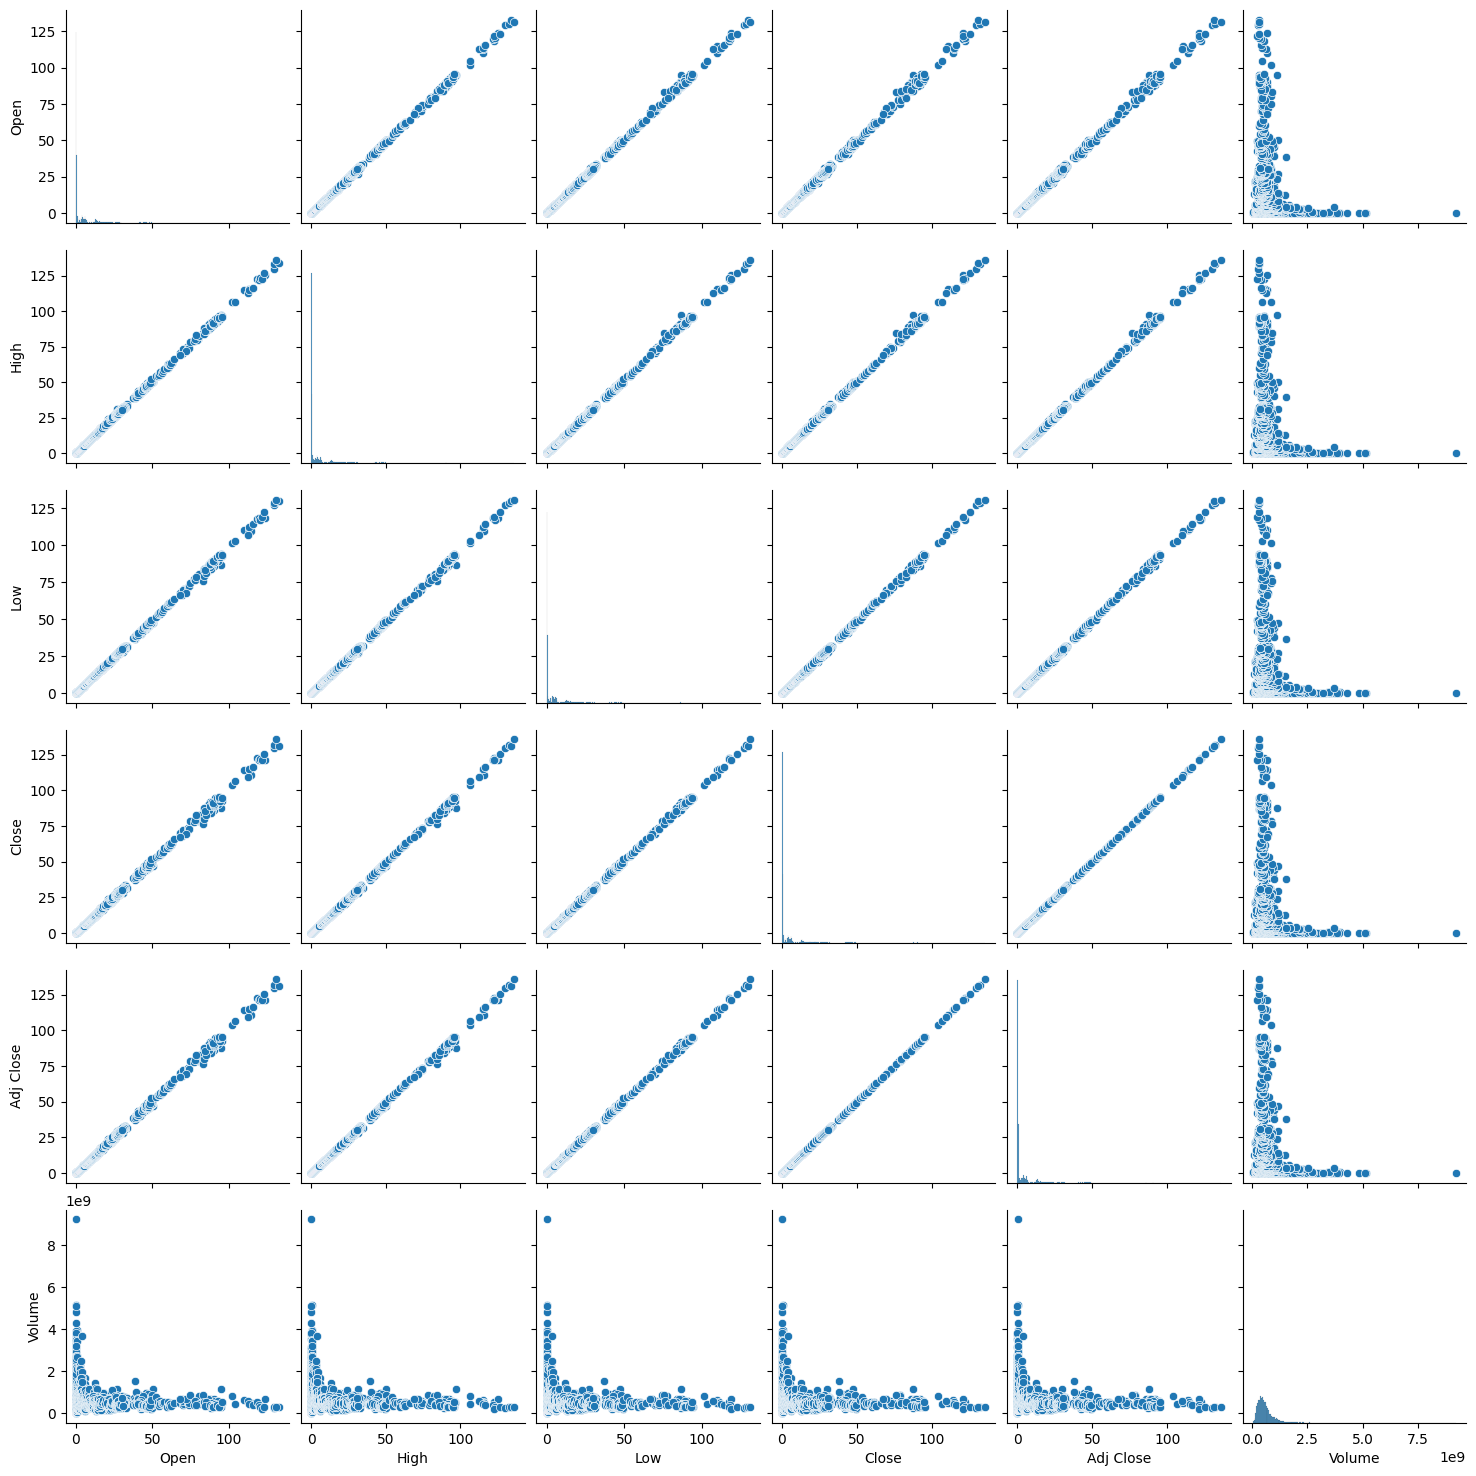

In [9]:
sns.pairplot(df.drop(columns=['Date']))

In [10]:
!pip install ta

In [11]:
from sklearn.model_selection import train_test_split
from ta.momentum import RSIIndicator



df['MovingAvg10'] = df['Close'].rolling(window=10).mean()
df['MovingAvg40'] = df['Close'].rolling(window=50).mean()

df['MoneyFlowMultiplier'] = ((2 * df['Close']) - df['High'] - df['Low']) / (df['High'] - df['Low'])
df['MoneyFlowVolume'] = df['MoneyFlowMultiplier'] * df['Volume']
df['AccumulationDistribution'] = df['MoneyFlowVolume'].cumsum()

rsi_period = 14 # a pretty standard period for RSI
rsi = RSIIndicator(close=df['Close'], window=rsi_period)
df['RSI'] = rsi.rsi()

df = df.dropna()

X = df[['Close', 'MovingAvg10', 'MovingAvg40', 'AccumulationDistribution', 'RSI']]
y = df['Close'].shift(-1).dropna()
X = X[:-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

Train MSE: 0.20018517255782595, Test MSE: 0.30923388056715495
Train RMSE: 0.44742057681540076, Test RMSE: 0.5560880151263422
Train MAE: 0.13344830031897248, Test MAE: 0.1350454708902866
Train R²: 0.9990406140900155, Test R²: 0.9982421471575488


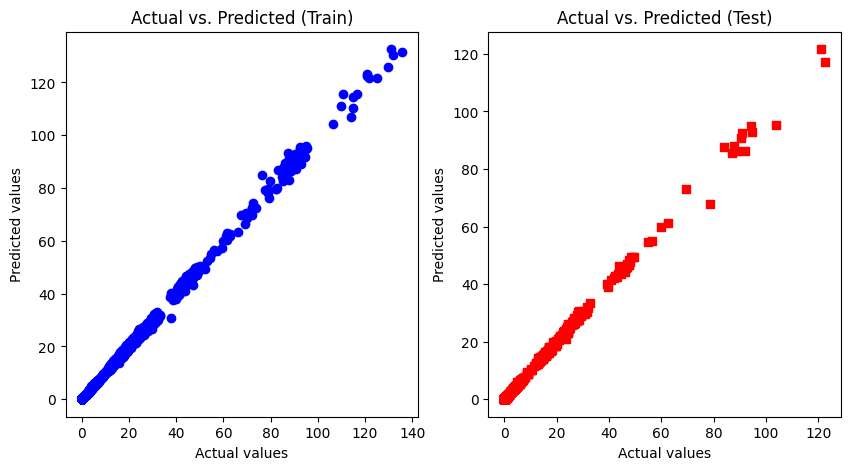

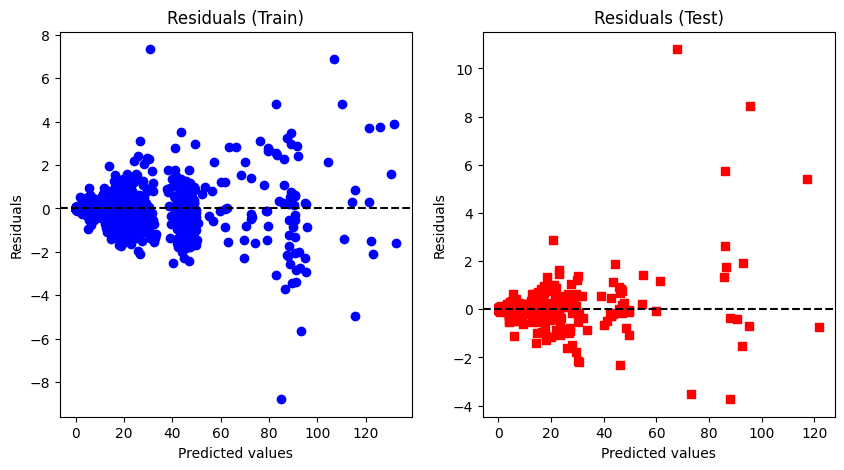

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")
print(f"Train R²: {train_r2}, Test R²: {test_r2}")

# Plotting predictions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
plt.title('Actual vs. Predicted (Train)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, c='red', marker='s', label='Test data')
plt.title('Actual vs. Predicted (Test)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

# Residual plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, y_train - y_train_pred, c='blue', marker='o', label='Training data')
plt.title('Residuals (Train)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.axhline(0, color='black', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, y_test - y_test_pred, c='red', marker='s', label='Test data')
plt.title('Residuals (Test)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

plt.axhline(0, color='black', linestyle='--')
plt.show()

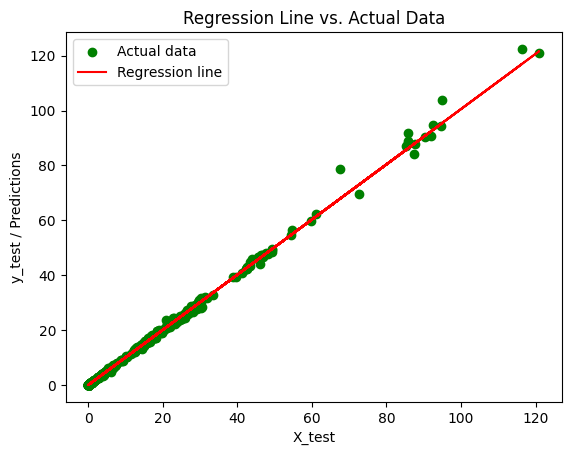

In [13]:
plt.scatter(X_test['Close'], y_test, color="green", label="Actual data")

plt.plot(X_test['Close'], y_test_pred, color="red", label="Regression line")

plt.xlabel("X_test")
plt.ylabel("y_test / Predictions")
plt.title("Regression Line vs. Actual Data")
plt.legend()

plt.show()

In [14]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


X = df[['MovingAvg10', 'AccumulationDistribution']]
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)  # 1 for price up, 0 for price down
X = X.dropna()
y = y[:len(X)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear')

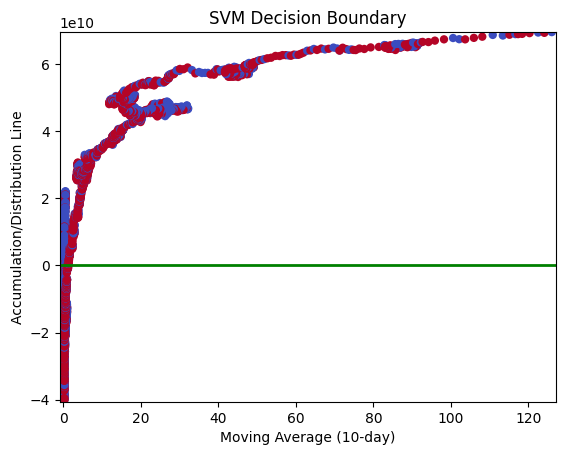

In [15]:
# Create a meshgrid for the plot
x_min, x_max = X['MovingAvg10'].min() - 1, X['MovingAvg10'].max() + 1
y_min, y_max = X['AccumulationDistribution'].min() - 1, X['AccumulationDistribution'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over the grid
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot data points
plt.scatter(X['MovingAvg10'], X['AccumulationDistribution'], c=y, cmap='coolwarm', edgecolors='none')

# Plot decision boundary
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='g')

# Add labels and title
plt.xlabel("Moving Average (10-day)")
plt.ylabel("Accumulation/Distribution Line")
plt.title("SVM Decision Boundary")
plt.show()